#CHAPTER 1. Basic Definition

## 1. Definition of Mixture Models

- Mixture model: probability distributions that can account for a variety of features in the data including multi-modality and skewness. 

- The idea of mixture models: to take multiple probability distributions and put them together in some sense using a linear combination.

- In a Mixture Model, All components don't have to belonging to the same family of distributions.

<br>

$$ F(x) = \sum_{k=1}^{K} w_k G_k (x) $$
$$ f(x) = \sum_{k=1}^{K} w_k g_k (x) $$
$$ , \sum_{k=1}^{K} w_k = 1$$

$$ \Leftrightarrow $$

$$ F(x) = \sum_{k=1}^{K} w_k G (x| \theta_k) $$
$$ f(x) = \sum_{k=1}^{K} w_k g (x| \theta_k) $$
$$ , \sum_{k=1}^{K} w_k = 1$$

<br>

- where, $w_k$ is called weight and $k$ is called component. Also, $\theta_k$ is paramters of each distributions.

- Example: Mixture of Normals

    1) Location Mixture of Normals
<br>
$$f(x) = \sum_{k=1}^{K} w_k {1 \over \sqrt{2 \pi} \sigma} exp \{ - {1 \over 2 \sigma^2} (x- \mu_k)^2 \}$$
<br>
    2) Location-Scale Mixture of Normals

<br>
$$f(x) = \sum_{k=1}^{K} w_k {1 \over \sqrt{2 \pi} \sigma_k} exp \{ - {1 \over 2 \sigma_k^2} (x- \mu_k)^2 \}$$
<br>

- Expectation of $X$

$$E_X (X) = \int_{-\infty}^{\infty} x f(x) dx $$ 
$$=\int_{-\infty}^{\infty} x \sum_{k=1}^{K} w_k g_k (x) dx $$
$$=\sum_{k=1}^{K} w_k \int_{-\infty}^{\infty} x g_k (x) dx $$
$$= \sum_{k=1}^{K} w_k E_k (X)$$ 

- Moment Generate Function of $X$

$$ M_X (t) = E_X (e^{tX}) = \int_{-\infty}^{\infty} e^{xt} f(x) dx $$
$$= \int_{-\infty}^{\infty} e^{xt} \sum_{k=1}^{K} w_k g_k (x) dx $$
$$=\sum_{k=1}^{K} w_k \int_{-\infty}^{\infty} e^{xt} g_k (x) dx $$
$$=\sum_{k=1}^{K} w_k M_{X|k} (t)$$ 

- Variance of $X$

$$E_X (X^2) = \int_{-\infty}^{\infty} x^2 f(x) dx $$
$$= \int_{-\infty}^{\infty} x^2 \sum_{k=1}^{K} w_k g_k (x) dx $$
$$= \sum_{k=1}^{K} w_k \int_{-\infty}^{\infty} x^2 g_k (x) dx $$
$$= \sum_{k=1}^{K} w_k E_k (X^2)$$
$$= \sum_{k=1}^{K} w_k [Var_k (X) + (E_k (X))]^2 $$ 

$$\Rightarrow$$


$$Var_X(X) = E_X(X^2) - E_X (X)^2$$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [ ]:
N = 100
sigma = 1
mu = [1, 5]
w = [0.4 , 0.6]

plt.bar(mu, w)
plt.title(r'$Q$', fontsize = 20)
plt.xlabel(r'$\mu$', fontsize = 15)
plt.ylabel(r'$w$', fontsize = 15)
plt.show()



## 2. Likelihood Function for Mixture Models

### 2.1 Hierarchical Representation

- Hierarchical Representation provides a very nice interpretation for mixture models, and will be very useful in terms of computation because most algorithms that are used for estimating the parameters in a mixture model are going to rely on some version of this categorical representation

- We define that Indicator $C \in \{ 1,2,...,K \}$ is Discrete Random Variable. 

<br>

$$X|C \sim g_c (x) \tag{2.1}$$
$$C \sim p(c)  \tag{2.2}$$

<br>

- where, $p(c) = Pr(C=c) = w_c$
- So, we can obtain that 
<br>
$$f(x) = \sum_{c=1}^{K} g(x|c) p(c) = \sum_{c=1}^{K} g_c(x) w_c $$
<br>

- If we know how to generate random variables from the $g_c$, hierarchical representation provide us a simple way to generate random variables from mixture.

> For each observation $i$, <br>
> 1) Randomly sample $c_i$ with probability given by $w_1, ..., w_k$ <br>
> 2) Given the value of $c_i$ that we just sampled 
> <br> $$X_i \sim g_{c_i}$$

- It means that we sample X_i from the $c_i$ component of the mixture



### 2.2 Graphical Representation

- Graphical Representation illustrate the Hierarchical Representation as a picture.

- In the below figure, grey circle is observed variable and white circle is latent variable.

- Latent variable $C$ only depends on the parameter $\tilde{w} = \{w_1, ..., w_K \}$

- Observed variable $X$ depends on the parameter $\tilde{\theta} = \{\theta_1, ..., \theta_K \}$ and Latent variable $C$

- Observation number is $N$





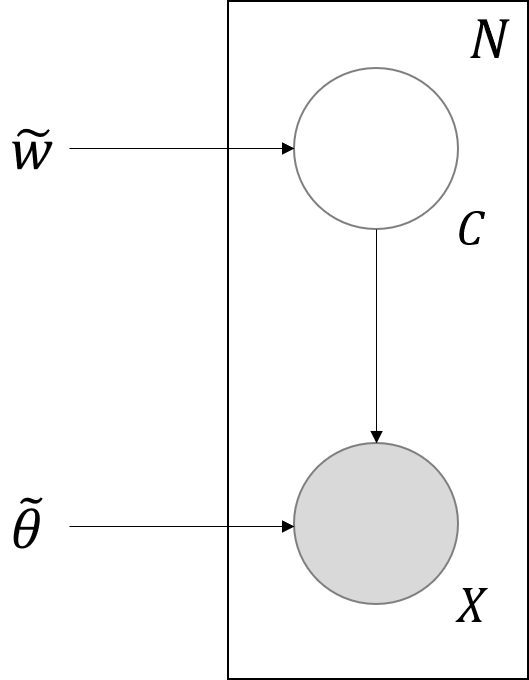

### 1.1.2 Mixtures of Gaussians

- 특성: 

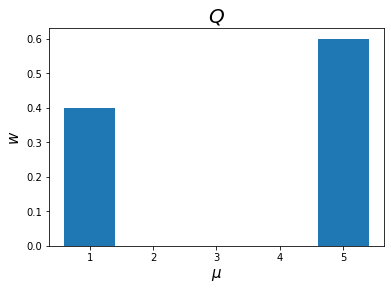

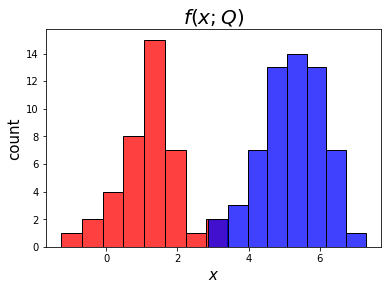

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


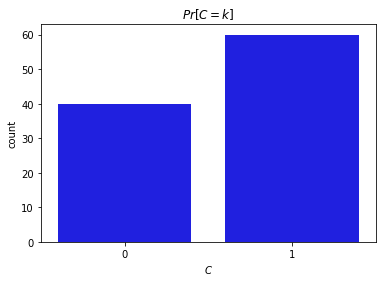

In [ ]:
# Bimodal

N = 100
sigma = 1
mu = [1, 5]
w = [0.4 , 0.6]

plt.bar(mu, w)
plt.title(r'$Q$', fontsize = 20)
plt.xlabel(r'$\mu$', fontsize = 15)
plt.ylabel(r'$w$', fontsize = 15)
plt.show()

col = ['r', 'b']

data = np.random.normal(mu[0], sigma, int(N*w[0]))
latent = np.repeat(0,int(N*w[0]))
sns.histplot(data, color = col[0])

for j in range(1,len(w)):
  input =  np.random.normal(mu[j], sigma, int(N*w[j]))
  sns.histplot(input, color = col[j])
  data = np.append(data, input)
  latent = np.append(latent, np.repeat(j,int(N*w[j])))

plt.title(r'$f(x;Q)$', fontsize = 20)
plt.xlabel('$x$', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()


sns.countplot(latent, color="blue")
plt.title(r'$Pr[C=k]$')
plt.xlabel(r'$C$')
plt.show()

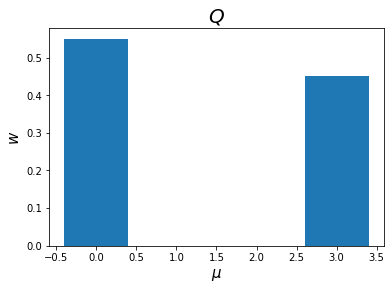

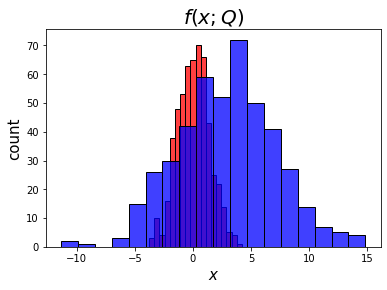

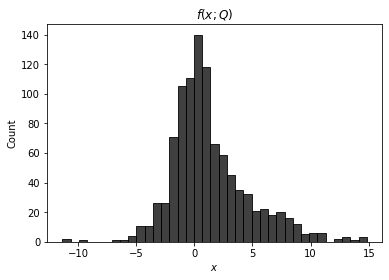

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


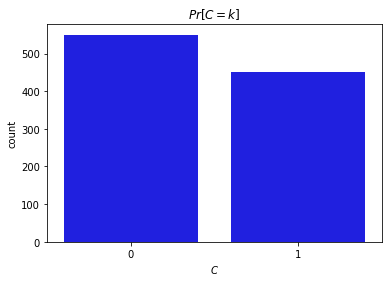

In [ ]:
# Skewed

N = 1000
mu = [0, 3]
w = [0.55 , 0.45]
sigma = [np.sqrt(2), 4]

plt.bar(mu, w)
plt.title(r'$Q$', fontsize = 20)
plt.xlabel(r'$\mu$', fontsize = 15)
plt.ylabel(r'$w$', fontsize = 15)
plt.show()

col = ['r', 'b']

data = np.random.normal(mu[0], sigma[0], int(N*w[0]))
latent = np.repeat(0,int(N*w[0]))
sns.histplot(data, color = col[0])

for j in range(1,len(w)):
  input =  np.random.normal(mu[j], sigma[j], int(N*w[j]))
  sns.histplot(input, color = col[j])
  data = np.append(data, input)
  latent = np.append(latent, np.repeat(j,int(N*w[j])))

plt.title(r'$f(x;Q)$', fontsize = 20)
plt.xlabel('$x$', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

sns.histplot(data, color="black")
plt.title(r'$f(x;Q)$')
plt.xlabel(r'$x$')
plt.show()

sns.countplot(latent, color="blue")
plt.title(r'$Pr[C=k]$')
plt.xlabel(r'$C$')
plt.show()

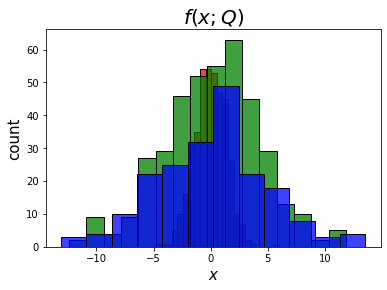

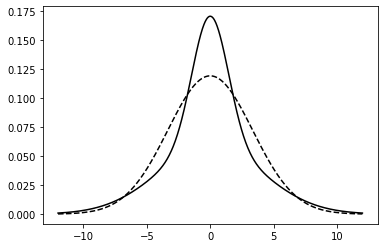

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


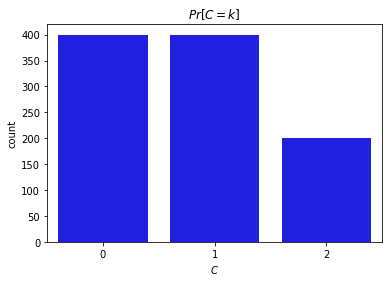

In [ ]:
# Heavy Tailed

N = 1000
mu = [0, 0, 0]
w = [0.4 , 0.4, 0.2]
sigma = [np.sqrt(2), np.sqrt(16), np.sqrt(20)]

col = ['r', 'g','b']

data = np.random.normal(mu[0], sigma[0], int(N*w[0]))
latent = np.repeat(0,int(N*w[0]))
sns.histplot(data, color = col[0])

for j in range(1,len(w)):
  input =  np.random.normal(mu[j], sigma[j], int(N*w[j]))
  sns.histplot(input, color = col[j])
  data = np.append(data, input)
  latent = np.append(latent, np.repeat(j,int(N*w[j])))

plt.title(r'$f(x;Q)$', fontsize = 20)
plt.xlabel('$x$', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

s = np.sqrt(0.4*2 + 0.4*16 + 0.2 * 20)
xx = np.linspace(-12, 12, 1000)
yy1 = scipy.stats.norm(loc= mu[0], scale=s).pdf(xx) 
yy2 = w[0]*scipy.stats.norm(loc= mu[0], scale=sigma[0]).pdf(xx)+w[1]*scipy.stats.norm(loc= mu[1], scale=sigma[1]).pdf(xx)+w[2]*scipy.stats.norm(loc= mu[2], scale=sigma[2]).pdf(xx) 
plt.plot(xx,yy1, linestyle="--", c = "black")
plt.plot(xx,yy2, c = "black")
plt.show()


sns.countplot(latent, color="blue")
plt.title(r'$Pr[C=k]$')
plt.xlabel(r'$C$')
plt.show()

- _The likelihood on a observation_

<br>

$$ L_i  (Q) = \int f_i(x_i ; \phi) dQ(\phi) = \int f_i (x_i  ; \phi) q(\phi) d\phi $$
<br>
<center> likelihood kernel function </center>
$$ L_i (\phi) = f_i(x_i ; \phi) $$ 

<br>
$$ L(Q) = \prod_{i=1}^{n} L_i (Q) $$
$$ l(Q) = ln(L(Q)) = \sum ln(L_i (Q)) $$

<br>

- _Assumption_

1) There are a fixed and known number of components, so that the unknown paramters are the $\pi's$ and $\phi's$

2) The distribution $Q$ is from some known parametric family of distributions, say $q(\phi; \gamma)$ , typically chosen to be either the normal denstiy with unknown mean and variance or the conjugate family of distributions to the density $f$





In [ ]:
import scipy.stats as stats

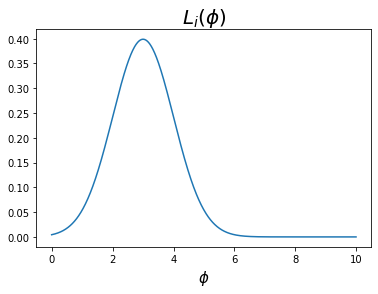

-199.13822369375742

In [ ]:
xi = np.arange(0,10,0.01)
pi = np.arange(0,1,0.01)
def likelihood_kernel(data, xi):
  dist = stats.norm(xi,1)
  out = dist.pdf(data)
  return out

p = likelihood_kernel(3, xi)
plt.plot(xi,p)
plt.xlabel(r'$\phi$', fontsize = 15)
plt.title(r'$L_i(\phi)$', fontsize = 20)
plt.show()

xi = [1, 5]
pi = [0.6, 0.4]

N = 100
sigma = 1

data = np.random.normal(xi[0], sigma, int(N*pi[0]))
latent = np.repeat(0,int(N*pi[0]))

for j in range(1,len(pi)):
  input =  np.random.normal(xi[j], sigma, int(N*pi[j]))
  data = np.append(data, input)
  latent = np.append(latent, np.repeat(j,int(N*pi[j])))

def likelihood(data, xi, pi, g):
  L = 0
  for j in range(0, g):
    L += pi[j] * likelihood_kernel(data[0],xi[j])
  l = np.log(L)

  for i in range(1, data.shape[0]):
    Li = 0
    for j in range(0, g):
      Li += pi[j] * likelihood_kernel(data[i],xi[j])
    li = np.log(Li)

    l += li
  return l

likelihood(data, xi, pi, 2)



<br>

- _Linear Inverse Problem_

$$ f(x;Q) = \int f(x;\phi) dQ(\phi)$$ 
<center> 

subject to 

$$ \sum \pi_j = 1  $$

$$ \pi_j >= 0 $$

 1) The linear inverse problem is difficult and unstable to solve.

 2) One of the key points is that Expectation-Maximization Algorithm
 
 </center>

- _Empirical and Hierarchical Bayes_

$$E[\Phi | X =x] = \int \phi \cdot p(\phi|X=x) = \int \phi \cdot \frac{f(x;\phi) \cdot q(\phi) }{ \int f(x;\phi) dQ(\phi)} = \frac{\int \phi f(x;\phi) dQ(\phi)}{\int f(x;\phi) dQ(\phi)}$$

<br>
<center>

1) Since $Q$ is unknown, one natural tactic is to replace the $Q$ in the above formula with an estimate, either parametric or nonparametric : see the book by Maritz and Lwin(1989)

2) One important aspect of empirical Bayes methods is that it has been learned that these methods have advantages in estimating a set of paramters $\xi_1 , \xi_2 ,..., \xi_m $

</center>
